In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/aishwarya/iris.data")

In [3]:
data.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.shape

(149, 5)

In [5]:
data.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [6]:
data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [7]:
lblenc = LabelEncoder()
lblenc.fit(data.values[:,4])
data['Iris-setosa'] = lblenc.transform(data['Iris-setosa'])

lblenc.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


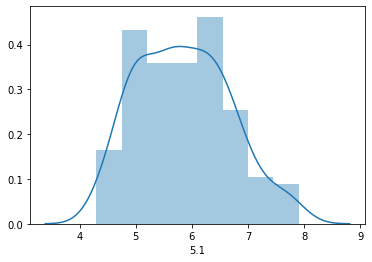

In [9]:
sns.distplot(data['5.1'])

(array([49.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

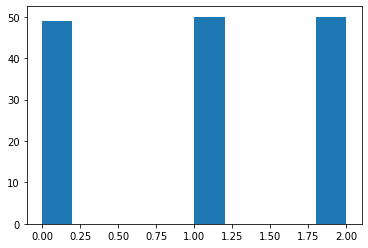

In [10]:
plt.hist(data.values[:,4]) #or data['Iris-setosa']

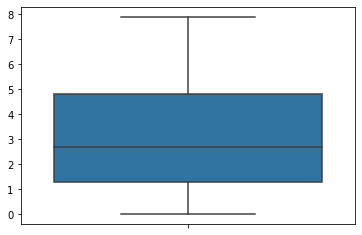

In [11]:
sns.boxplot(data, orient="v")

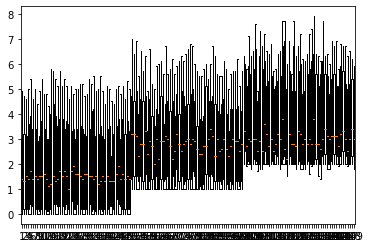

In [12]:
plt.boxplot(data, vert=True)
plt.show()

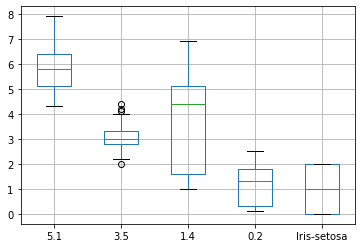

In [13]:
data.boxplot() #use this

In [14]:
X = data.drop(["Iris-setosa"], axis=1)
y = data.values[:,4]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [16]:
# classical naive bayes works on multinomial distribution - categorical data
# gaussian naive bayes works on normal distribution - continuous data

In [17]:
# decision tree
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc= metrics.accuracy_score(y_test, preds)
print(acc)
metrics.confusion_matrix(y_test,preds)

0.9


array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  3, 10]])

In [18]:
#random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
acc=metrics.accuracy_score(y_test, preds)
print(acc)
metrics.confusion_matrix(y_test,preds)

0.9


/home/aishwarya/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  3, 10]])

In [19]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc=metrics.accuracy_score(y_test,preds)
print(acc)
metrics.confusion_matrix(y_test,preds)

0.9


array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  3, 10]])